# pandas

[pandas](https://pandas.pydata.org/) is an open source library for tabular heterogeneous data manipulation. The core structures are `Series` and `DataFrame` which can be seen as a collection of Series.  In addition `pandas` provides the necessary means for data cleaning and preparation. `pandas` uses NumPy array structure  as an extension type with methods for conversion in both directions.

&#9888; A major difference between numpy arrays and `pandas` Series and DataFrame is in the way that <tt>pandas</tt> indices are used. In NumPy the index is implicitly assigned $0..(n-1)$ whereas `pandas` Series and DataFrame have similar behaviour but in addition allow labels as indices. In addition the indices are preserved after applying operations.

Many parallels can be drawn between <tt>pandas</tt> and `tidyverse` R package. In terms of data structure, Series and DataFrame can be viewed as vectors and data.frame/tibble respectively. Furthermore, in terms of functionality most data manipulation operations available in tidyverse have a counterparts in <tt>pandas</tt>.


In [ ]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 25.3 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# convention
import pandas as pd
import numpy as np

from numpy.random import default_rng
rng = default_rng()

## Series

`Series` is a sequence of values, possibly of heterogeneous types. You can create Series with the <tt>pd.Series</tt> function.

**Synopsis: &nbsp; &nbsp;**<tt>Series(data=None, index=None, dtype=None, name=None, copy=False)</tt>
 - data: array, iterable, dict, scalar
 - index: 1-dimensional array, otherwise $0..(n-1)$
 - dtype: [data types](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes), otherwise inferred
 - name: optional
 - copy: default False, data is not copied but is a reference

In [2]:
s = pd.Series([3,5,7])
s = pd.Series({'a':3, 'b':5, 'c':7})
s = pd.Series([3,5,7], index=['a','b','c'])
s = pd.Series([3,5,7])

Input data to pd.Series is not copied by default. In the following scenario an update to Series `s` propogates to NumPy array `arr`:

In [4]:
arr = np.array(range(3,7+1,2)) # NumPy array [3,7] with step=2
s = pd.Series(arr, copy=False) # default copy=False
s[1] = -1                      # set value s[1] to -1

Series, besides the ordered indices $0..(n-1)$, may also be viewed as a dictionary where values are accessed based on mapped indices to values:

In [5]:
s = pd.Series({'a':3, 'b':5, 'c':7})
s[1] == s['b']

/var/folders/f4/t_cy1xv16699zj8q2mf2mcs00000gn/T/ipykernel_53542/3114200323.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[1] == s['b']


np.True_

Operations between Series are carried out based on matching indices as opposed to element-wise:

In [6]:
s1 = pd.Series({'a':3, 'b':5, 'c':2})
s2 = pd.Series({'b':3, 'a':5, 'c':2})
s1+s2

a    8
b    8
c    4
dtype: int64

and they don't have to be the same size:

In [7]:
s3 = pd.Series({'b':3, 'a':5, 'c':2, 'd':10}) # there is no matching 'd' in s1 therefore d=NaN
s1+s3

a    8.0
b    8.0
c    4.0
d    NaN
dtype: float64

Index membership:

In [8]:
"b" in s1 # s1 : {'a':3, 'b':5, 'c':2}

True

In contrast to NumPy arrays, and R vectors, being homogenous containers, Series may take up values of different types:

In [9]:
s = pd.Series({'a':3, 'b':5, 'c':'7'})
s.dtype
[type(v) for v in s]

[int, int, str]

## Series methods and submodules

An exhaustive review of [Series' methods and submodules](https://pandas.pydata.org/docs/reference/series.html#) is beyond the scope of this course. Here we only review several common uses.



In [15]:
import matplotlib

0.1    2.302585
0.2    1.609438
0.3    1.203973
0.4    0.916291
0.5    0.693147
         ...   
9.5    2.251292
9.6    2.261763
9.7    2.272126
9.8    2.282382
9.9    2.292535
Length: 99, dtype: float64

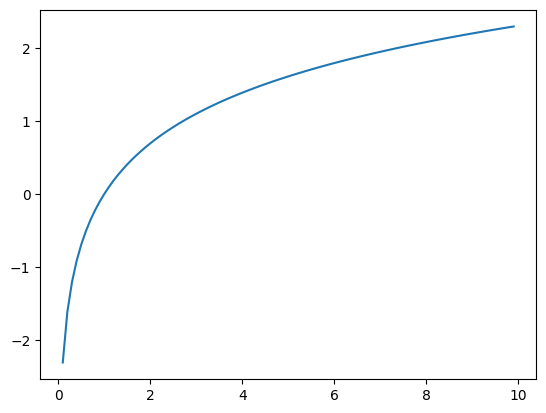

In [16]:
s1 = pd.Series(['apple', 'watermelon', 'orange', 'pear', 'cherry', 'strawberry'],
               index=list("abcdef"))
s2 = pd.Series(['apple', 'kiwi', 'orange', 'pear', 'cherry', 'grape'],
               index=list("abcdef"))
s3 = pd.Series(np.log(np.arange(0.1,10,.1)), index=np.arange(0.1,10,.1))
s4 = np.array([""])

s1.unique()
s1.count()
s1.compare(s2)
s1.filter(['a','b'])
s3.plot();
s1.drop(['b','f'])
s3.apply(lambda x: np.abs(x))

## Timestamp

In [17]:
dates = pd.Series(['1-4-1988', '1-1-1987', '1-12-2011', '1-6-2005', '1-5-2005'])
tss = pd.to_datetime(dates,format="%d-%m-%Y")
tss.min(), tss.max()
tss.sort_values()

1   1987-01-01
0   1988-04-01
4   2005-05-01
3   2005-06-01
2   2011-12-01
dtype: datetime64[ns]

# DataFrame

The pandas' DataFrame is a 2-dimensional structure which may be viewed as a collection of Series. It has indices for both dimensions. We will use the terms observations and variables for rows and columns interchangeably. DataFrame, and Series, can hold dimensions $>2$ with the so called `hierarchical indexing` which is beyond the scope of this course.

&#9888; We will be working with homogeneous Series in the context of DataFrames.

To create a DataFrame use the function pd.DataFrame:

**Synopsis: &nbsp; &nbsp;**<tt>DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)</tt>

Most arguments are familiar from pd.Series except the additional *columns* with which the indices of the second dimension are controlled.


In [19]:
df = pd.DataFrame(data=[[3,'a'], [5,'b'], [7,'c']],                    # list, tuple, or np.array
                  columns=['x', 'y'])                                  #
df = pd.DataFrame({'x': [3,5,7], 'y': ['a','b','c']})                  # dictionary of columns
df = pd.DataFrame({3:'a', 5:'b', 7: 'c'}.items(), columns= ['x','y'])  # dictionary of rows
df

,x,y
0,3,a
1,5,b
2,7,c


## DataFrame : read/write

You may want to store or share with others the DataFrame you just created. The most common data format to store a DataFrame is comma-separated-values (csv) format. Use `to_csv` method to export a DataFrame and `pd.read_csv` import:

In [21]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)})
df.to_csv("df.csv",index=False)   # write df to file 'df.csv', do not include index
df = pd.read_csv("df.csv")        # read df.csv into df object
df

,x,y
0,-0.860713,0.400433
1,-0.638131,-0.840511
2,0.002406,-1.662309
3,-0.925054,1.035322
4,-0.933505,0.691802
5,-0.641842,-1.676925
6,1.431034,1.315333
7,0.614456,0.212343
8,-0.571427,0.069555
9,1.071652,-1.504838


## Inspect content

In [38]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)}) # x and y two random variables

df.head()                   # top 5 (default) observation
df.tail(2)                  # last 2 observations
df.head(5).tail(2)          # composition
df.shape                    # size of the dimensions
df.size                     # total number of elements
df.columns                  # the columns indices/names
df.dtypes                   # listing of all columns' types
df.describe()               # descriptive summary of all variables

,x,y
count,10.000000,10.000000
mean,-0.409559,0.039147
std,1.490659,0.727558
min,-3.415019,-0.949046
25%,-1.006376,-0.650457
50%,-0.604709,0.195492
75%,0.855158,0.533654
max,1.570220,1.118245


## Select columns

### Single column

You can select a column from a DataFrame using the square bracket `df["column_name"]` or `df.column_name`. When only one column name is given the result is a Series, with a list of columns the result is a DataFrame:

In [39]:
df["x"]   # Series
df.x      # <=>  df["x"]
df[["x"]] # DataFrame

,x
0,-0.969966
1,-1.508814
2,1.167913
3,-3.415019
4,-0.681353
5,1.066314
6,0.221689
7,-0.528065
8,-1.018513
9,1.570220


Only `valid python names` can be accessed through dot `.`:

In [36]:
pd.DataFrame({'valid_name': [1,2,3], 'another variable':[3,2,1]  }).valid_name

0    1
1    2
2    3
Name: valid_name, dtype: int64

### Multiple columns

Use a list of indices to select multiple columns:

In [40]:
df[['Periods', 'TotalSupply_1']]  # explicit
df[df.columns[[1,2]]]             # use indices on df.columns

KeyError: "None of [Index(['Periods', 'TotalSupply_1'], dtype='object')] are in the [columns]"

## Select rows

### Using logical criteria

Similar to NumPy logical masks we can filter out rows for which the logical condition succeeds. A condition on the variables of a DataFrame returns a logical value for each row in a format of a `Series` object:

In [41]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)}) # x and y two random variables
df[((df.x < 0) & (df.y > 0))]  # parentheses are required

,x,y
3,-1.734609,0.872757
6,-0.474223,0.637686


### Using index : loc method

Rows in a Dataframe are by default indexed with $[0,n)$. The `DataFrame` method `loc` can be used in the following forms:

- `df.loc[<row-label>]`                : select a row by numeric index
- `df.loc[<row-label>,<column-label>]` : select the indexed entry

Both row-label and column-label may take values such as, a single label,  list/array of labels, slices, boolean arrays and series. Though these indexing schemes may look similar to NumPy, there are two cautionary remarks:

- The labels are not positional indices.
- The slices used with `.loc` are inclusive of start and stop, i.e. [0,k].


In [42]:
df.loc[1]               # [.] row 1 as a Series
df.loc[[1]]             # [[.]] row 1 as a DataFrame
df.loc[1,'x']           # [.,.] labels
df.loc[0:3, 'x':'y']    # [.,.] slices
df.loc[df.x > df.y,'x'] # [.,.] boolean

0    1.297574
2   -1.359290
4    0.758476
5    0.986158
8   -0.619895
9   -0.783531
Name: x, dtype: float64

**iloc:** Also take a look at the method `iloc` which is similar to `loc` except it only accepts positional integers or ranges for rows and columns indices.

## Update variables

DataFrame's columns can be updated with an assignment `=` with or without a row selection:

In [48]:
df.x=range(df.shape[0])            # variable size and the size of the new values must match.
df.loc[(df.x % 2 ==0),'y'] = None  # set y values to NaN where x is an even value
df

,x,y
0,0,NaN
1,1,1.241735
2,2,NaN
3,3,0.872757
4,4,NaN
5,5,-1.229764
6,6,NaN
7,7,1.001339
8,8,NaN
9,9,-1.039774


Value update according to a selection should only be done using `.loc` (or `.iloc`) method. For example both selections below are equivalent but only the `.loc` version can be used in an assignment:

In [49]:
s1 = df[0::2]['y']      # selection with composition (aka chained)
s2 = df.loc[0::2, 'y']  # selection with loc
s1.equals(s2)           # s1 == s2
df[0::2]['y'] = -2      # warning
df.loc[0::2, 'y'] = -2  # valid

/var/folders/f4/t_cy1xv16699zj8q2mf2mcs00000gn/T/ipykernel_53542/3463181715.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[0::2]['y'] = -2      # warning
/var/folders/f4/t_cy1xv16699zj8q2mf2mcs00000gn/T/ipykernel_53542/3463181715.py:

## Merge Series and DataFrames

To combine DataFrames use the `pd.concat` function:

**Synopsis: &nbsp; &nbsp;**<tt>concat(objs, axis=0, ignore_index=False, copy=True)</tt>

In [50]:
s1 = pd.Series(list("abcd"))          # ['a', 'b', 'c', 'd']
s2 = pd.Series(range(4))              # [0, 4)
pd.concat([s1,s2])                    # Series
pd.concat([s1,s2], ignore_index=True)  # Series
pd.concat([s1,s2], axis=1)            # DataFrame

,0,1
0,a,0
1,b,1
2,c,2
3,d,3


In [57]:
df1 = pd.DataFrame({'a':range(3), 'b':list("abc")})
df2 = pd.DataFrame({'c':range(5), 'b':list("abcde"[::-1])})
pd.concat([df1,df2], axis=0, join='outer')  # along axis 0
pd.concat([df1,df2], axis=1, join='outer')  # along axis 1

,a,b,c,b
0,0.0,a,0,e
1,1.0,b,1,d
2,2.0,c,2,c
3,NaN,NaN,3,b
4,NaN,NaN,4,a


## Add row to DataFrame

For this we can use the `pd.concat` function:

In [62]:
df = pd.DataFrame({'Year': [2021, 2021], 'Month': [11, 12],'Day': [9, 16]})
new_row =  pd.DataFrame({'Year': [2023], 'Month': [3],'Day': [20]})
pd.concat([df, new_row])

,Year,Month,Day
0,2021,11,9
1,2021,12,16
0,2023,3,20


## Missing values

Recall the special values None and NaN from the lectures representing no value and not a number. They are of different types and have different properties. In the context of DataFrames we have the notion of missing values, and they can be represented by both.

NaN and None types:

In [63]:
s = pd.Series(["0", float('nan'), np.nan,  2, None])
[type(v) for v in s]

[str, float, float, int, NoneType]

### Handling missing data

Possible actions when dealing with missing data are  *summarise*, *remove* or *replace* missing values.

To be able to do any action on missing values you'll need to first find them. DataFrame and Series have the methods `isna` and `isnull` (alias to `isna`) for finding missing values. Both return a logical mask with `True` marking the location of the missing values. We will use `isna` throughout the lectures.

In [68]:
s.isna()      # isna: boolean marking missing value
s[s.notna()]  # <=> s[~ s.isna()]

0    0
3    2
dtype: object

With `dropna` you may discard all missing from a Series object. With DataFrames you'll have more control in how to discard the missing

**Synopsis: &nbsp; &nbsp;**<tt>pandas.DataFrame.dropna(axis=0, how='any', thresh=None, inplace=False)</tt>

In [70]:
sample_space = np.arange(10).tolist() + ([np.nan]*2)
df = pd.DataFrame(rng.choice(sample_space,25).reshape(5,5))
df

,0,1,2,3,4
0,7.0,0.0,0.0,1.0,0.0
1,9.0,NaN,6.0,7.0,NaN
2,9.0,NaN,7.0,2.0,1.0
3,4.0,5.0,3.0,3.0,NaN
4,2.0,0.0,5.0,0.0,1.0


In [71]:
df.dropna(axis=0) # default : drop rows having any missing values
df.dropna(axis=1) # drop columns having any missing values
df.dropna(axis=1, how='all') # drop columns having only missing values

,0,1,2,3,4
0,7.0,0.0,0.0,1.0,0.0
1,9.0,NaN,6.0,7.0,NaN
2,9.0,NaN,7.0,2.0,1.0
3,4.0,5.0,3.0,3.0,NaN
4,2.0,0.0,5.0,0.0,1.0


With `fillna` we can replace the missing with values, either fixed or a set of values (Series,DataFrame etc.) according to the indices. We only illustrate scalars here:

In [73]:
df.fillna(0)
df.fillna(df.mean(axis=0))

,0,1,2,3,4
0,7.0,0.000000,0.0,1.0,0.000000
1,9.0,1.666667,6.0,7.0,0.666667
2,9.0,1.666667,7.0,2.0,1.000000
3,4.0,5.000000,3.0,3.0,0.666667
4,2.0,0.000000,5.0,0.0,1.000000


## Group operations

When the data has categorical variables we may be interested in descriptive statistics on each group. This can be done by first grouping the data with `groupby` method and then summarise on those groups. I'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset for illustration.

In [74]:
diamonds = pd.read_csv("data/diamonds.csv") # read diamonds.csv

In [80]:
grp = diamonds[diamonds.columns.drop(['color'])].groupby(['cut', 'clarity'], as_index=False) #
grp.indices
grp.ngroups
df = grp.mean()
df

,cut,clarity,carat,depth,table,price,x,y,z
0,Fair,I1,1.361000,65.699048,58.114286,3703.533333,6.723000,6.624238,4.386905
1,Fair,IF,0.474444,60.066667,59.111111,1912.333333,5.050000,5.050000,3.033333
2,Fair,SI1,0.964632,63.910294,59.126961,4208.279412,6.127230,6.071985,3.895711
3,Fair,SI2,1.203841,64.421888,58.828326,5173.916309,6.570343,6.503927,4.211867
4,Fair,VS1,0.879824,62.945294,60.365294,4165.141176,5.932353,5.864059,3.709882
5,Fair,VS2,0.885249,63.637548,59.050958,4174.724138,5.966590,5.907011,3.780230
6,Fair,VVS1,0.664706,60.417647,61.235294,3871.352941,5.503529,5.508824,3.327647
7,Fair,VVS2,0.691594,62.847826,59.237681,3349.768116,5.495507,5.464638,3.444058
8,Good,I1,1.203021,62.067708,59.497917,3596.635417,6.651562,6.614792,4.065625
9,Good,IF,0.616338,61.440845,59.056338,4098.323944,5.278310,5.315070,3.252958
